<h1 style="text-align: center;">MÔ TẢ BÀI TOÁN</h1>

<b>Các yếu tố như tuổi, giới tính, chỉ số BMI, số lượng trẻ em, việc hút thuốc, và khu vực cư trú ảnh hưởng đến mức phải trả tiền cho bảo hiểm sức khỏe vì chúng có mối liên hệ với rủi ro bệnh tật và chi phí y tế. Dưới đây là cách mỗi yếu tố có thể ảnh hưởng:
+ Tuổi: Người cao tuổi thường có nguy cơ mắc các bệnh liên quan đến tuổi tác cao hơn, do đó, có thể đòi hỏi chi phí bảo hiểm cao hơn.
+ Giới tính: Có những bệnh lý ảnh hưởng đặc biệt đến nam giới hoặc nữ giới, do đó, giới tính có thể ảnh hưởng đến mức độ rủi ro và chi phí bảo hiểm.
+ Chỉ số BMI: Người có chỉ số BMI cao hơn có nguy cơ cao hơn mắc các bệnh như tiểu đường, bệnh tim và các vấn đề sức khỏe khác, dẫn đến chi phí bảo hiểm cao hơn.
+ Số lượng trẻ em: Việc bảo hiểm càng nhiều người (bao gồm trẻ em) sẽ tăng chi phí bảo hiểm do có nhiều người phải được bảo vệ.
+ Người hút thuốc: Người hút thuốc thường có nguy cơ cao hơn mắc các bệnh lý liên quan đến thuốc lá, nên bảo hiểm có thể tăng giá để bù đắp cho rủi ro này.
+ Khu vực cư trú: Chi phí y tế và mức độ rủi ro bệnh tật có thể biến đổi tùy theo khu vực, dẫn đến sự khác biệt trong mức độ chi phí bảo hiểm.

<b>Những yếu tố này giúp các công ty bảo hiểm đánh giá rủi ro và xác định mức độ chi phí phù hợp để bảo vệ khách hàng.<b>

<h1 style="text-align: center;">1. IMPORT CÁC THƯ VIỆN</h1>

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import linregress
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

<h1 style="text-align: center;">2. LOAD DỮ LIỆU</h1>

In [6]:
# Lấy dữ liệu từ tệp dữ liệu
data = pd.read_csv('insurance.csv')
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<h1 style="text-align: center;">3. XỬ LÝ DỮ LIỆU</h1>

<h2>Loại bỏ các giá trị trùng lặp</h2>

In [9]:
# Kiểm tra các giá trị trùng lăp
# In ra tổng các hàng trong dữ liệu
print('Tổng số hàng:', data.shape[0])
print('Các giá trị trùng lăp:', data.duplicated().sum())

Tổng số hàng: 1338
Các giá trị trùng lăp: 1


In [10]:
# Tìm giá trị trùng lặp
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


<b>Có vẻ như khi thu thập dữ liệu đã vô tình nhập thành 2 lần, để đảm bảo có 1 bộ dữ liệu đẹp em quyết định xóa dữ liệu bị trùng đi.</b>

In [12]:
# Xóa giá trị trùng lặp
data = data.drop_duplicates()
print('Tổng số hàng còn lại sau khi xóa: ', data.shape[0])

Tổng số hàng còn lại sau khi xóa:  1337


<b>Tệp dữ liệu sau khi xóa dữ liệu trùng lặp còn 1337 dòng</b>

<h2>Sửa lỗi cấu trúc</h2>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<b>Có 3 cột dữ liệu ở dạng danh mục, em sẽ đếm tần suất và kiểm tra xem các dữ liệu có đồng nhất hay không</b>

In [17]:
# Đếm tần suất và kiểm tra xem các dữ liệu có đồng nhất hay không
region_count = data['region'].value_counts()
sex_count = data['sex'].value_counts()
smoker_count = data['smoker'].value_counts()
print(f'{sex_count}\n{smoker_count}\n{region_count}')

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


<b>Có thể thấy các dữ liệu đã được đồng nhất.<b>

In [19]:
# Kiểm tra xem có khoảng trắng trong các cột dữ liệu object hay không
columns_to_check = ['sex', 'smoker','region']

# Kiểm tra khoảng trắng trong mỗi cột
for column in columns_to_check:
    # Kiểm tra nếu có chuỗi nào chứa khoảng trắng ở đầu hoặc cuối
    has_whitespace = data[column].str.contains(r'^\s|\s$', regex=True)
    
    if has_whitespace.any(): 
        # Dùng any() để khi has_whitespace có khoảng trắng thì sẽ trả về True và thực hiện khối lên
        print(f"Có khoảng trắng trong cột '{column}' ở các hàng sau:")
        print(data[has_whitespace])
        # Xóa khoảng trắng ở đầu và cuối của các chuỗi trong cột
        data[column] = data[column].str.strip()
    else:
        print(f"Không có khoảng trắng trong cột '{column}'")

Không có khoảng trắng trong cột 'sex'
Không có khoảng trắng trong cột 'smoker'
Không có khoảng trắng trong cột 'region'


<h2>Xử lý các dữ liệu bị thiếu</h2>

In [21]:
print('Total count of missing values:',data.isna().sum().sum())
print('Missing valus per column: ')
data.isna().sum()

Total count of missing values: 0
Missing valus per column: 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
print('Tổng số hàng còn lại sau khi xóa: ', data.shape)

Tổng số hàng còn lại sau khi xóa:  (1337, 7)


<b>Không bị thiếu dữ liệu</b>

<h2>Lọc các ngoại lệ</h2>

In [25]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<b>Nhìn vào các hệ số mean, max thì có vẻ như là không có dữ liệu ngoại lai, nhưng để chắc chắc hơn em sẽ tính thêm chỉ số z_score.</b> 

In [27]:
from scipy import stats

# Tính toán z-score cho các cột 'bmi', 'charges'
data["z_score_BMI"] = stats.zscore(data["bmi"], ddof=1)
data["z_score_Charges"] = stats.zscore(data["charges"], ddof=1)

# Lọc ra các cột ngoại lai
data_outliers_bmi = data[(data["z_score_BMI"] > 3) | (data["z_score_BMI"] < -3)][["z_score_BMI"]]
data_outliers_charges = data[(data["z_score_Charges"] > 3) | (data["z_score_Charges"] < -3)][["z_score_Charges"]]

# In ra các cột giá trị ngoại lai
print("Các cột giá trị ngoại lai của 'BMI':\n", data_outliers_bmi)
print("\nCác cột giá trị ngoại lai của 'Charges':\n", data_outliers_charges)

Các cột giá trị ngoại lai của 'BMI':
       z_score_BMI
116      3.015596
847      3.231973
1047     3.592601
1317     3.682758

Các cột giá trị ngoại lai của 'Charges':
       z_score_Charges
34           3.130827
543          4.169266
577          3.739935
819          3.456238
1146         3.246122
1230         3.859694
1300         4.072030


In [28]:
# Xóa các cột ngoại lai
print("Dữ liệu trước khi lọc ", data.shape)
data = data.drop(data_outliers_bmi.index)
data = data.drop(data_outliers_charges.index)
print("Dữ liệu sau khi lọc ", data.shape)

Dữ liệu trước khi lọc  (1337, 9)
Dữ liệu sau khi lọc  (1326, 9)


<b>Sau khi lọc các giá trị ngoại lai, bộ dữ liệu còn 1326 dòng</b>

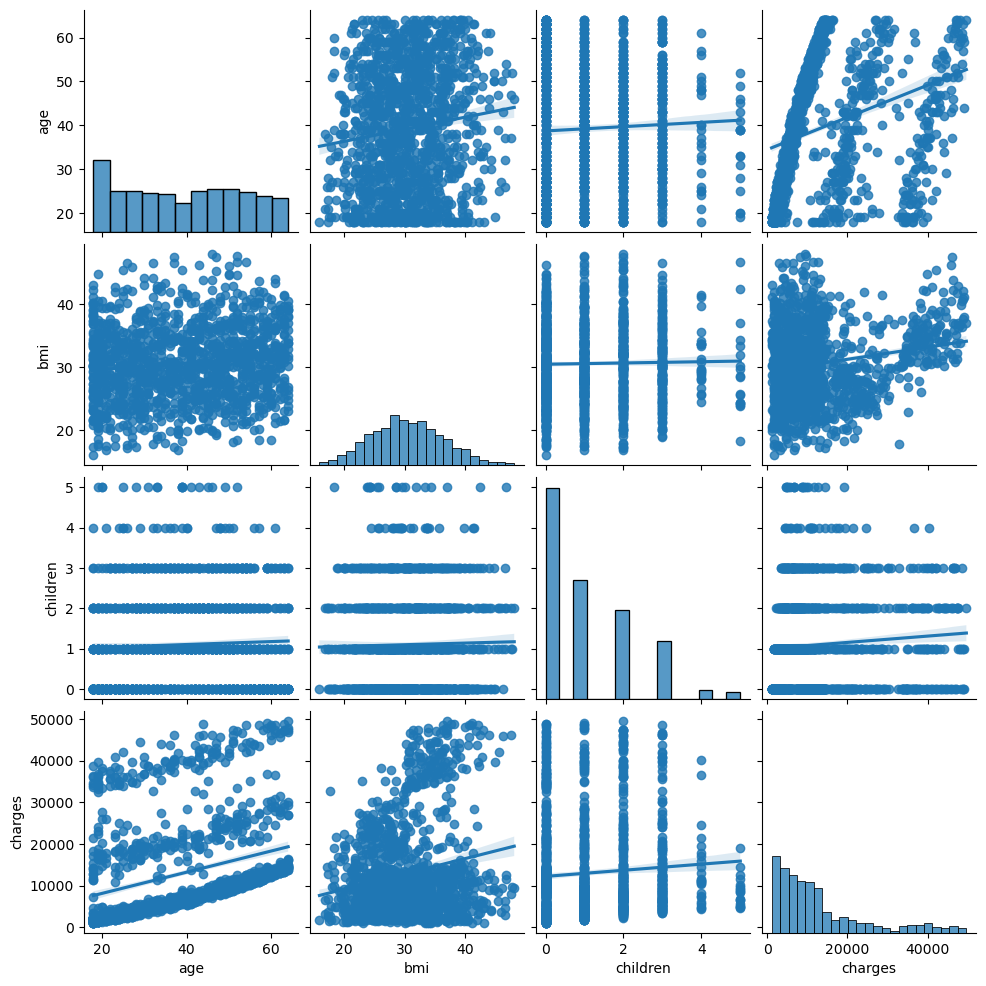

In [30]:
# in ra biểu đồ pairplot để làm rõ các mối tương quan giữa các cột
# xóa các cột Z_score trong data
data = data.drop(columns=['z_score_BMI', 'z_score_Charges'])
# vẽ đường hồi quy giữa các cột 
sns.pairplot(data, kind='reg')

<b><i>Nhận xét:</i></b><br>
<b>Nhìn chung, dựa vào biểu đổ pairplot ta có thể thấy bmi, age có mối tương quan dương với charge, giữa smoker và children với charges có sự tương quan yếu. Nhưng để có cái nhìn rõ hơn, em sẽ sử dụng 1 số dạng biểu đồ khác để thể hiện mối tương quan giữa các biến độc lập với biến phục thuộc "charges".</b>

<h1 style="text-align: center;">4. FEATURE ENGINEERING</h1>

<h2>Feature Creation</h2>

In [34]:
# Tạo biến 'age_bmi_risk' bằng cách nhân age và bmi
data['age_bmi_risk'] = data['age'] * data['bmi']
data.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi_risk
0,19,female,27.900,0,yes,southwest,16884.92400,530.100
1,18,male,33.770,1,no,southeast,1725.55230,607.860
2,28,male,33.000,3,no,southeast,4449.46200,924.000
3,33,male,22.705,0,no,northwest,21984.47061,749.265
4,32,male,28.880,0,no,northwest,3866.85520,924.160


In [35]:
# Khởi tạo LabelEncoder
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho cột 'sex'
data['sex_encoded'] = encoder.fit_transform(data['sex'])

# Hiển thị dữ liệu

data.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi_risk,sex_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,530.100,0
1,18,male,33.770,1,no,southeast,1725.55230,607.860,1
2,28,male,33.000,3,no,southeast,4449.46200,924.000,1
3,33,male,22.705,0,no,northwest,21984.47061,749.265,1
4,32,male,28.880,0,no,northwest,3866.85520,924.160,1


In [36]:
# Tạo biến mới bằng cách nhân sex_encoded với bmi
data['sex_bmi_risk'] = data['sex_encoded'] * data['bmi']

# Hiển thị dữ liệu
print(data[['sex', 'bmi', 'sex_encoded', 'sex_bmi_risk']])


         sex     bmi  sex_encoded  sex_bmi_risk
0     female  27.900            0         0.000
1       male  33.770            1        33.770
2       male  33.000            1        33.000
3       male  22.705            1        22.705
4       male  28.880            1        28.880
...      ...     ...          ...           ...
1333    male  30.970            1        30.970
1334  female  31.920            0         0.000
1335  female  36.850            0         0.000
1336  female  25.800            0         0.000
1337  female  29.070            0         0.000

[1326 rows x 4 columns]


In [37]:
# Định nghĩa các khoảng độ tuổi và nhãn tương ứng
bins = [0, 20, 40, 60, 80]
labels = ['Thanh thiếu niên', 'Người trưởng thành', 'Trung niên', 'Người cao tuổi']

# Tạo nhóm độ tuổi
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Hiển thị vài hàng đầu để kiểm tra
print(data[['age', 'age_group']].head())


   age           age_group
0   19    Thanh thiếu niên
1   18    Thanh thiếu niên
2   28  Người trưởng thành
3   33  Người trưởng thành
4   32  Người trưởng thành


C:\Users\Admin\AppData\Local\Temp\ipykernel_17196\3235951957.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='charges', data=data, estimator=np.mean, ci=None)


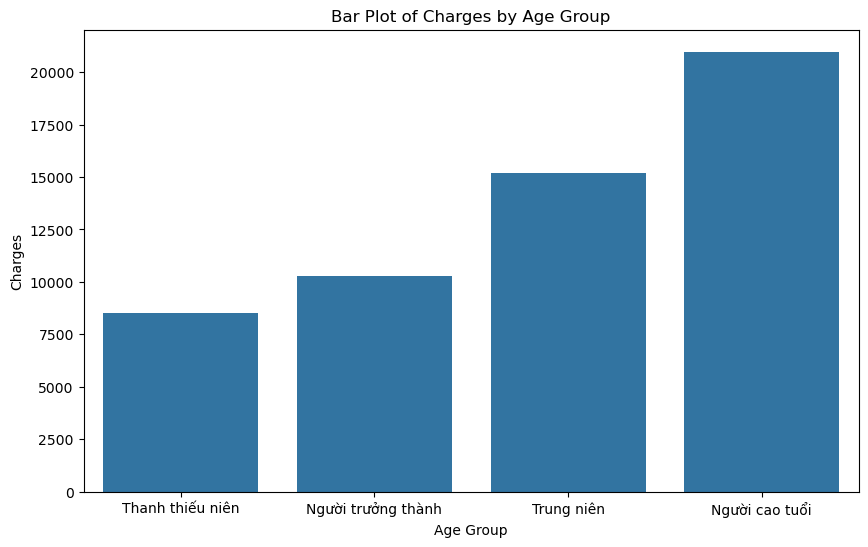

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', data=data, estimator=np.mean, ci=None)
plt.title('Bar Plot of Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()

<b><i>Nhận xét:</i><b><br>
<b>Nhìn vào biểu đồ ta thấy giữa các nhóm tuổi với charges có mối tương quan dương với nhau, điều này có thể giải thích bởi các yếu tố sau:</b><br>
+ Chi phí y tế tăng theo độ tuổi: Thường thì người cao tuổi có xu hướng sử dụng dịch vụ y tế nhiều hơn, do có nguy cơ cao hơn về các vấn đề sức khỏe và cần kiểm tra, chăm sóc định kỳ.
+ Bệnh lý và điều trị đắt đỏ: Các bệnh lý thường phát hiện và phát triển nhiều khi tuổi tác tăng, và điều trị cho những bệnh lý này thường đắt đỏ, dẫn đến chi phí y tế tăng.
+ Yếu tố lối sống và rủi ro: Người ở độ tuổi cao hơn có khả năng gặp các vấn đề sức khỏe liên quan đến lối sống (như bệnh tim mạch, tiểu đường) cao hơn, điều này cũng là một yếu tố làm cho chi phí y tế tăng.<b><br>
+ Yếu tố văn hóa và xã hội: Các yếu tố văn hóa và xã hội như lối sống, chế độ ăn uống, và môi trường sống cũng ảnh hưởng đến sức khỏe và chi phí y tế ở mọi độ tuổi.</b>



C:\Users\Admin\AppData\Local\Temp\ipykernel_17196\1867892022.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['age_group', 'sex'])['charges'].mean().reset_index()


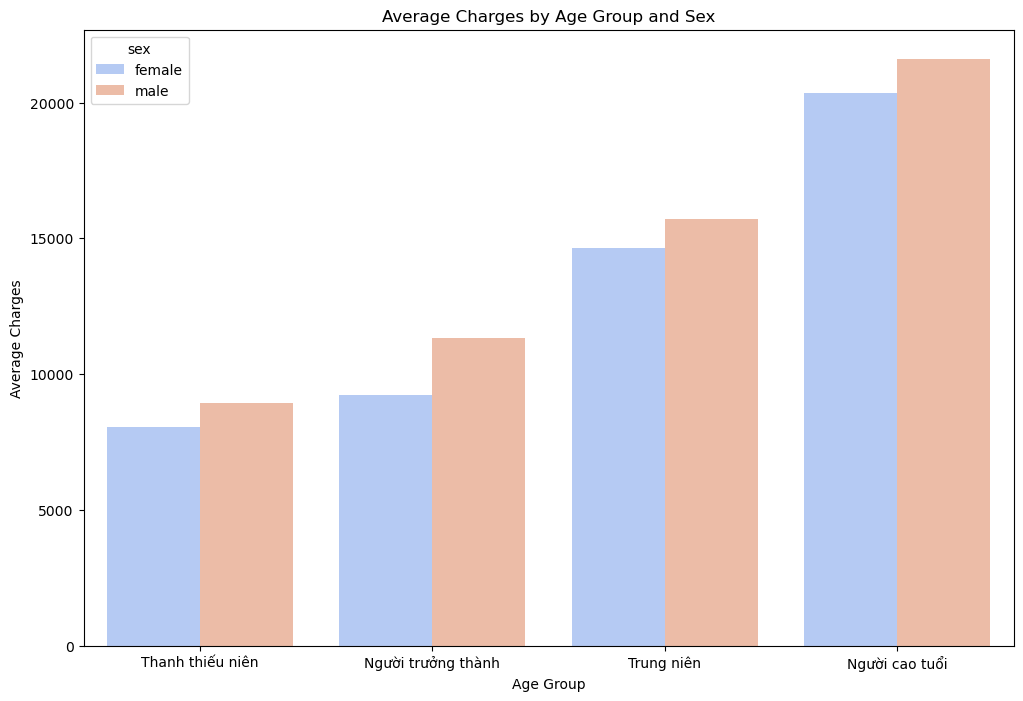

In [40]:
import matplotlib.pyplot as plt

# Group by age_group and sex, and calculate the mean charges
grouped_data = data.groupby(['age_group', 'sex'])['charges'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot a bar chart
sns.barplot(x='age_group', y='charges', hue='sex', data=grouped_data, palette='coolwarm')

# Add labels and title
plt.title('Average Charges by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')

# Show the plot
plt.show()

<b>Nhận xét:</b><br>
<b>Giá trị "charges" ở cả nam và nữ ở các độ tuổi đều có xu hướng tăng nhanh, ngoài các yếu tố ảnh hưởng chung đã giải thích theo độ tuổi ở phía trên thì nguyên nhân giá trị trung bình của "charges" ở nam luôn cao hơn nữ là do:<br>
+ Hành vi nguy hiểm: Nam giới thường có xu hướng tham gia vào các hoạt động rủi ro hơn như hút thuốc, uống rượu, lái xe quá tốc độ... Điều này làm tăng nguy cơ mắc các bệnh liên quan như ung thư phổi, bệnh gan, tai nạn giao thông.
+ Các bệnh lý đặc trưng: Một số bệnh lý thường gặp ở nam giới như bệnh tim mạch, ung thư tuyến tiền liệt có thể đòi hỏi các phương pháp điều trị phức tạp và tốn kém hơn.
+ Kiểm tra sức khỏe định kỳ: Nam giới thường ít đi khám sức khỏe định kỳ hơn nữ giới, dẫn đến việc phát hiện bệnh ở giai đoạn muộn hơn, khi chi phí điều trị đã cao hơn.
+ Yếu tố sinh học: Một số nghiên cứu cho thấy rằng nam giới có hệ miễn dịch yếu hơn nữ giới, dễ mắc bệnh hơn và tuổi thọ trung bình thấp hơn.</b>

C:\Users\Admin\AppData\Local\Temp\ipykernel_17196\1232656824.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='smoker', y='charges', data=data, estimator=np.mean, ci=None)


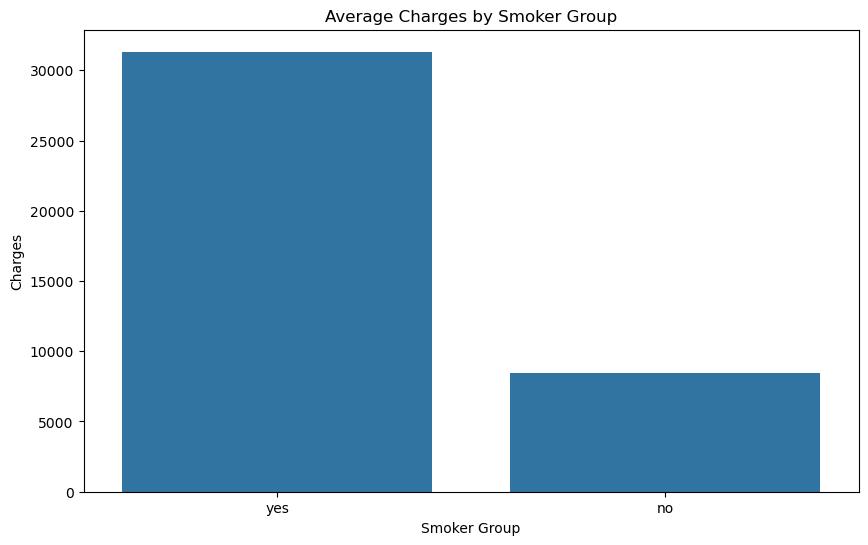

In [42]:
# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='smoker', y='charges', data=data, estimator=np.mean, ci=None)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Average Charges by Smoker Group')
plt.xlabel('Smoker Group')
plt.ylabel('Charges')
# Hiển thị biểu đồ
plt.show()

<b>1 câu hỏi đặt ra ở đây, tại sao những người hút thuốc lại có mức chi trả chi phí bảo hiểm cao hơn những người không hút?. Để trả lời câu hỏi này ta sẽ xét đến nguyên nhân sau đây:
+ Nguy cơ sức khỏe cao hơn: Người hút thuốc có nguy cơ mắc nhiều bệnh mãn tính cao hơn đáng kể so với người không hút thuốc, như bệnh tim mạch, ung thư đặc biệt là ung thư phổi, có liên quan trực tiếp đến việc hút thuốc.<br>
<b>=> Chi phí điều trị cao hơn: Các bệnh liên quan đến thuốc lá thường đòi hỏi chi phí điều trị cao hơn, bao gồm:
    - Thuốc men: Người hút thuốc thường phải dùng nhiều loại thuốc để điều trị các bệnh liên quan.
    - Viện phí: Chi phí nhập viện, phẫu thuật và các thủ tục y tế khác cho người hút thuốc thường cao hơn.<br> 
<b>=>Tuổi thọ trung bình thấp hơn: Người hút thuốc thường có tuổi thọ trung bình thấp hơn so với người không hút thuốc, điều này cũng ảnh hưởng đến mức phí bảo hiểm.</b>

C:\Users\Admin\AppData\Local\Temp\ipykernel_17196\2803711179.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='region', y='charges', data=data, estimator=np.mean, ci=None)


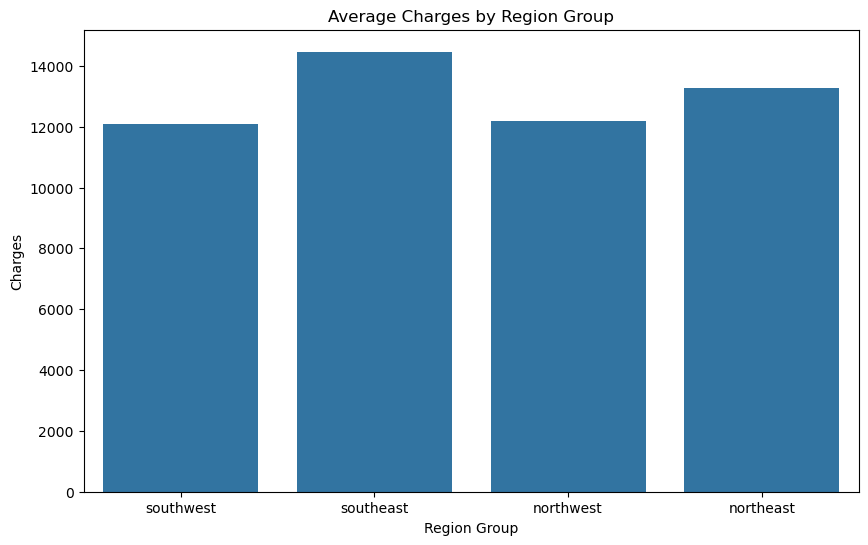

In [44]:
# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='region', y='charges', data=data, estimator=np.mean, ci=None)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Average Charges by Region Group')
plt.xlabel('Region Group')
plt.ylabel('Charges')

# Hiển thị biểu đồ
plt.show()

<b>Nhận xét:</b><br>
<b>Nhìn chung, giá trị trung bình của "charges" ở các khu vực đều cao, cao nhất là khu vực Đông Nam, sau đó là Đông Bắc, khu vực Tây Nam và Tây Bắc có vẻ có mức giá trị trung bình ngang nhau. Nguyên nhân dẫn đến chi phí phải chi trả bảo hiểm cảu khu vực Đông Nam cao là do:
+ Sức khỏe kém: Người dân Đông Nam Mỹ thường gặp các vấn đề sức khỏe như béo phì, tiểu đường, thói quen ăn uống không lành mạnh, ít vận động và tỷ lệ hút thuốc cao ở một số khu vực Đông Nam cũng góp phần làm tăng gánh nặng bệnh tật, kéo theo chi phí bảo hiểm tăng.
+ Hệ thống y tế: Cơ sở vật chất y tế chưa đồng đều, sự cạnh tranh giữa các nhà cung cấp dịch vụ y tế thấp, dẫn đến việc các cơ sở y tế có thể tăng giá dịch vụ, và cuối cùng, các công ty bảo hiểm phải chi trả nhiều hơn.
+ Yếu tố kinh tế - xã hội: Thu nhập thấp, giáo dục hạn chế, chính sách y tế chưa đồng bộ cũng góp phần làm tăng chi phí.</b>

#### Tiếp theo để xem khi thêm nhân tố smoker vào biểu đồ để xem mối tương quan có ảnh hưởng gì không, em sẽ sử dụng biểu đồ scratter.

In [47]:
# Sử dụng LabelEncoder để chuyển đổi nhãn thành dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])

# Hiển thị vài hàng đầu để kiểm tra
print(data[['age', 'age_group', 'age_group_encoded']].head())

   age           age_group  age_group_encoded
0   19    Thanh thiếu niên                  2
1   18    Thanh thiếu niên                  2
2   28  Người trưởng thành                  1
3   33  Người trưởng thành                  1
4   32  Người trưởng thành                  1


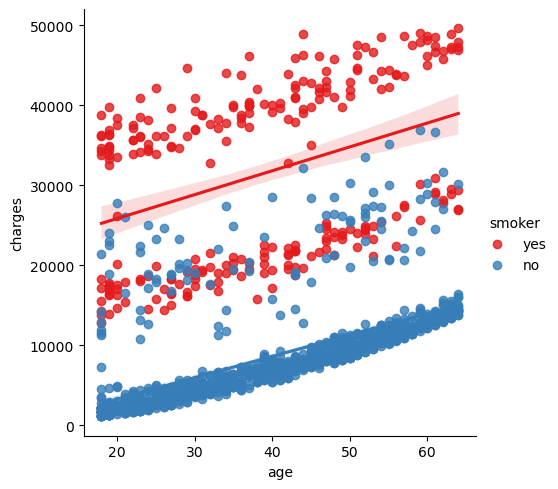

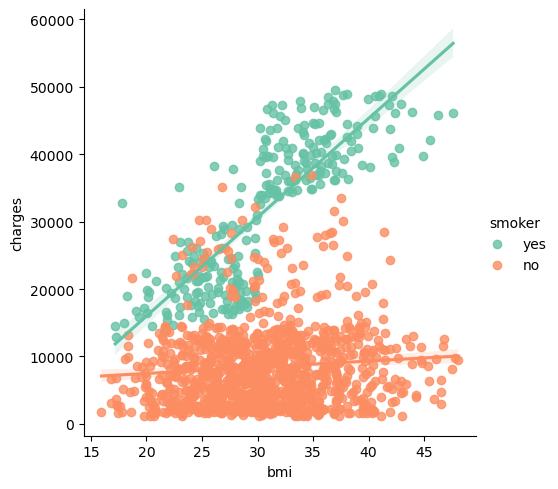

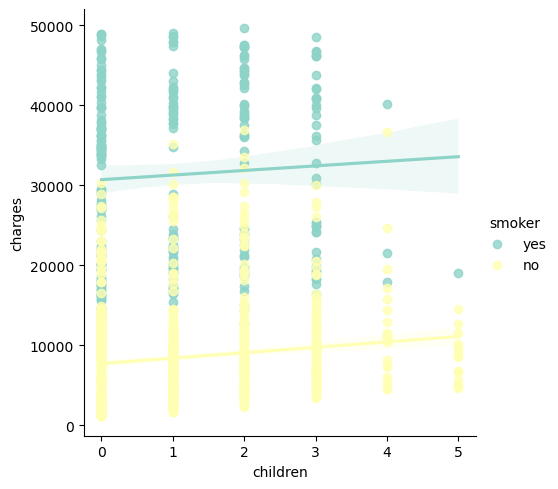

In [48]:
# Biểu đồ lmplot cho 'age' và 'charges' theo 'smoker'
sns.lmplot(x='age', y='charges', data=data, hue='smoker', palette='Set1')

# Biểu đồ lmplot cho 'bmi' và 'charges' theo 'smoker'
sns.lmplot(x='bmi', y='charges', data=data, hue='smoker', palette='Set2')

# Biểu đồ lmplot cho 'children' và 'charges' theo 'smoker'
sns.lmplot(x='children', y='charges', data=data, hue='smoker', palette='Set3')

<b><i>Nhận xét:</i></b><br>
<b> + Có thể thấy mối tương quan dương mạnh giữa 2 biến age và smoker với charges, tuổi càng cao thì tỉ lệ hút thuốc càng nhiều do đó kéo theo chi phí phải trả cho bảo hiểm cũng cao. Điều này cũng dễ hiểu, người trưởng thành phải đối mặt nhiều với nhiều áp lực cuộc sống công việc nên sẽ tìm đến các loại thuốc lá để trấn an tinh thần, cũng có vài người sử dụng thuốc lá như thói quen hằng ngày. Dù nguyên nhân tác động nào thì khi hút thuốc sẽ gây ra rất nhiều căn bệnh nguy hiểm, chính vì vậy chi phí bảo hiểm phải chi trả cho những người này cũng khá là cao. </b><br>
<b> + Tương tự cũng có thể thấy mối tương quan mạnh giữa 3 biến BMI, smoker với charger, số người hút thuốc tỉ lệ thuận với chỉ số BMI đồng thời tỉ lệ thuận với Charges. Những người hút thuốc thường có nguy cơ mắc bệnh liên quan đến béo phì đồng nghĩa với việc chi phí bảo hiểm cho những người này cũng tăng.</b><br>
<b> + Ta có thể thấy giữa smoker và children với charges có sự tương quan yếu.</b>

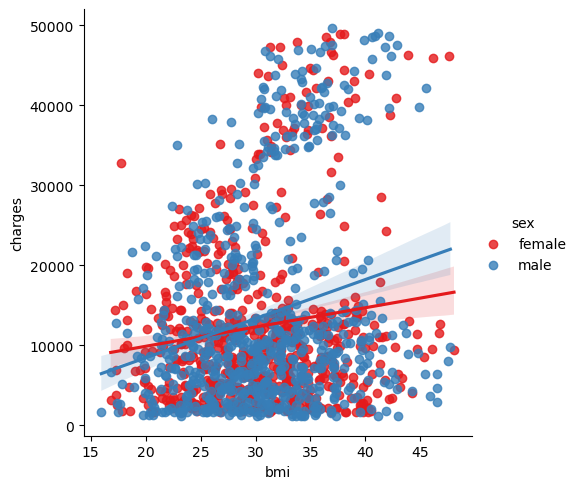

In [50]:
# Biểu đồ lmplot cho 'bmi' và 'charges' theo 'sex'
sns.lmplot(x='bmi', y='charges', data=data, hue='sex', palette='Set1')

<b>Nhìn biểu đồ có thể thấy, chỉ số bmi ở nam giới lẫn nữ giới đều có mối tương quan dương với chi phải mức bảo hiểm phải chi trả, nhưng ở nam giới lại có mối tương quan mạnh hơn nữ là do ở nam giới thường có lối sống không lành mạnh như hút thuốc, rượu bia dẫn đến các bệnh béo phì, tim mạch, tiểu đường.. điều đó đồng nghĩa với việc chi phí bảo hiểm phải chi trả ở nhóm người này cũng tăng cao.</b>

<h2>Feature Transformation</h2>

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Áp dụng LabelEncoder cho cột 'sex'
data['region_encoded'] = encoder.fit_transform(data['region'])
data['smoker_encoded'] = encoder.fit_transform(data['smoker'])
data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])

In [55]:
data.describe()

,age,bmi,children,charges,age_bmi_risk,sex_encoded,sex_bmi_risk,age_group_encoded,region_encoded,smoker_encoded
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,39.227753,30.570743,1.099548,13039.837572,1209.147704,0.503017,15.496056,1.840121,1.513575,0.200603
std,14.037019,5.992764,1.207167,11677.031551,520.683895,0.500180,15.979139,1.062608,1.106842,0.400603
min,18.000000,15.960000,0.000000,1121.873900,287.280000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4740.287150,764.037500,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,30.300000,1.000000,9303.297725,1147.790000,1.000000,17.432500,2.000000,2.000000,0.000000
75%,51.000000,34.560000,2.000000,16389.832412,1587.715000,1.000000,30.685000,3.000000,2.000000,0.000000
max,64.000000,48.070000,5.000000,49577.662400,2684.000000,1.000000,47.740000,3.000000,3.000000,1.000000


In [56]:
scaler = StandardScaler()

# Select the columns you want to scale
columns_to_scale = ['age_group_encoded', 'bmi', 'children', 'charges', 'age_bmi_risk', 'sex_bmi_risk', 'smoker_encoded', 'region_encoded']

# Apply Standardization
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the standardized data
print(data)

      age     sex       bmi  children smoker     region   charges  \
0      19  female -0.445829 -0.911193    yes  southwest  0.329411   
1      18    male  0.534055 -0.082495     no  southeast -0.969301   
2      28    male  0.405518  1.574902     no  southeast -0.735942   
3      33    male -1.313035 -0.911193     no  northwest  0.766291   
4      32    male -0.282237 -0.911193     no  northwest -0.785854   
...   ...     ...       ...       ...    ...        ...       ...   
1333   50    male  0.066648  1.574902     no  northwest -0.208975   
1334   18  female  0.225233 -0.911193     no  northeast -0.928142   
1335   18  female  1.048202 -0.911193     no  southeast -0.977501   
1336   21  female -0.796384 -0.911193     no  southwest -0.945108   
1337   61  female -0.250520 -0.911193    yes  northwest  1.379426   

      age_bmi_risk  sex_encoded  sex_bmi_risk           age_group  \
0        -1.304638            0     -0.970134    Thanh thiếu niên   
1        -1.155239            1  

<b>Nhận xét:<br>
• Ta thấy các biến độc lập có chỉ số tương quan rất thấp và hầu như không có.<br>
• Nên chúng ta có thể kết luận mô hình này tốt và không có sự tương quan giữa các biến độc lập.</b>

In [118]:
data.describe()

,age_group_encoded,sex_encoded,bmi,children,smoker_encoded,region_encoded,charges,age_bmi_risk,sex_bmi_risk
count,1.326000e+03,1326.000000,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03
mean,6.162324e-17,0.503017,1.607563e-17,-8.171777e-17,-5.626470e-17,4.487779e-17,-6.296287e-17,2.089832e-16,-1.507090e-16
std,1.000377e+00,0.500180,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00
min,-1.732355e+00,0.000000,-2.438984e+00,-9.111931e-01,-5.009425e-01,-1.367988e+00,-1.021018e+00,-1.771162e+00,-9.701338e-01
25%,-7.909195e-01,0.000000,-7.262733e-01,-9.111931e-01,-5.009425e-01,-4.641752e-01,-7.110267e-01,-8.551794e-01,-9.701338e-01
50%,1.505161e-01,1.000000,-4.519534e-02,-8.249484e-02,-5.009425e-01,4.396373e-01,-3.201113e-01,-1.178851e-01,1.212315e-01
75%,1.091952e+00,1.000000,6.659302e-01,7.462034e-01,-5.009425e-01,4.396373e-01,2.869958e-01,7.273321e-01,9.509070e-01
max,1.091952e+00,1.000000,2.921166e+00,3.232298e+00,1.996237e+00,1.343450e+00,3.130214e+00,2.833598e+00,2.018639e+00


<h2>Feature Selection</h2>

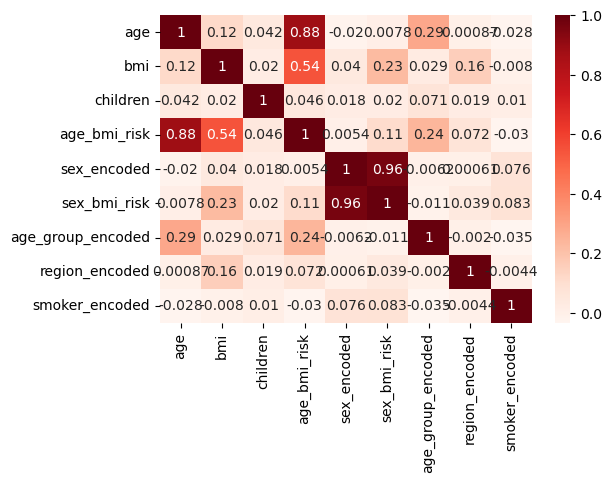

In [59]:
# Kiểm tra tính đa cộng tuyến giữa các biến độc lập
# convert các cột dữ liệu object thành dạng số
data_dct = data.select_dtypes(include=[float, int])

# Chỉ lấy các biến độc lập nên xóa biến phụ thuộc
data_dct = data_dct.drop(columns='charges')

# Tính ma trận tương quan giữa các biến độc lập
corr_matrix = data_dct.corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

<b>Nhận xét:<br>
• Ta thấy các biến độc lập có chỉ số tương quan rất thấp và hầu như không có.<br>
• Nên chúng ta có thể kết luận mô hình này tốt và không có sự tương quan giữa các biến độc lập.</b>

In [61]:
data = data[['age_group_encoded', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges','age_bmi_risk', 'sex_bmi_risk']]

# Hàm thực hiện Forward Selection với chỉ số R-squared hiệu chỉnh
def forward_selection(data, response):
    remaining_features = list(data.columns)
    remaining_features.remove(response)
    selected_features = []
    best_adj_rsq = 0

    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            formula = "{} ~ {}".format(response, ' + '.join(selected_features + [candidate]))
            model = ols(formula, data).fit()
            rsq = model.rsquared
            num_params = len(model.params)
            num_obs = len(data)
            adj_rsq = 1 - (1 - rsq) * ((num_obs - 1) / (num_obs - num_params - 1))
            scores_with_candidates.append((adj_rsq, candidate))
        
        scores_with_candidates.sort(reverse=True)
        best_new_adj_rsq, best_candidate = scores_with_candidates[0]
        
        if best_new_adj_rsq > best_adj_rsq:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            best_adj_rsq = best_new_adj_rsq
            print(f"Selected feature: {best_candidate}, Adjusted R-squared: {best_new_adj_rsq}")
        else:
            break

    formula = "{} ~ {}".format(response, ' + '.join(selected_features))
    model = ols(formula, data).fit()
    return model, selected_features

# Gọi hàm forward_selection
response_variable = 'charges'
best_features = forward_selection(data, response_variable)
print("Best features selected:", best_features)

Selected feature: smoker_encoded, Adjusted R-squared: 0.6154514627908818
Selected feature: age_bmi_risk, Adjusted R-squared: 0.7446486433853724
Selected feature: children, Adjusted R-squared: 0.7470991861595602
Selected feature: region_encoded, Adjusted R-squared: 0.7480208440036524
Best features selected: (<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AE6C1EF410>, ['smoker_encoded', 'age_bmi_risk', 'children', 'region_encoded'])


<b>Nhận xét:</b><br>
<b>Qua quá trình chọn lựa biến theo phương pháp forward selection, chúng ta nhận thấy:
+ Biến smoker, age và bmi: Khi lần lượt đưa các biến này vào mô hình, chỉ số Adjusted R-squared (R bình phương hiệu chỉnh)tăng đáng kể, cho thấy các biến này có mối quan hệ tuyến tính mạnh với biến phụ thuộc (charges). Điều này đồng nghĩa với việc hút thuốc, tuổi tác và chỉ số khối cơ thể là những yếu tố có ảnh hưởng lớn đến chi phí bảo hiểm y tế.
+ Biến children, region và sex: Việc đưa thêm các biến này vào mô hình chỉ làm tăng nhẹ chỉ số Adjusted R-squared, cho thấy ảnh hưởng của các biến này đến chi phí bảo hiểm là không đáng kể so với các biến đã chọn trước đó.</b><br>
<b>Kết luận: Dựa trên kết quả phân tích, chúng ta có thể loại bỏ các biến region và sex khỏi mô hình cuối cùng. Mô hình tối ưu nhất sẽ bao gồm các biến smoker, age và bmi. </b>

<h1 style="text-align: center;">4. CHIA TỆP DỮ LIỆU</h1>

In [64]:
from sklearn.model_selection import train_test_split

X = data[['smoker_encoded', 'region_encoded','children', 'age_bmi_risk']]
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="text-align: center;">6. XÂY DỰNG MÔ HÌNH</h1>

In [66]:
print(data.columns)


Index(['age_group_encoded', 'sex_encoded', 'bmi', 'children', 'smoker_encoded',
       'region_encoded', 'charges', 'age_bmi_risk', 'sex_bmi_risk'],
      dtype='object')


In [67]:
from statsmodels.formula.api import ols

# Đảm bảo tên cột khớp với DataFrame của bạn
#ols_formula = "charges ~ bmi + children + age + C(sex) + C(smoker) + C(region)"
ols_formula = 'charges ~ smoker_encoded + age_bmi_risk + children + region_encoded'
# Tạo DataFrame huấn luyện từ X_train và y_train
train_data = X_train.copy()
train_data['charges'] = y_train

# Thực hiện mô hình hồi quy tuyến tính OLS
OLS = ols(formula=ols_formula, data=train_data)
model = OLS.fit()

# In ra tóm tắt của mô hình
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     811.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.77e-320
Time:                        00:14:50   Log-Likelihood:                -766.97
No. Observations:                1060   AIC:                             1544.
Df Residuals:                    1055   BIC:                             1569.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0084      0.015     -0.

<b><i>Nhận xét:</i></b>
<b>Ta thấy chỉ số Adj. R-squared: có sai số gần 30% ở mức tạm chấp nhận được. Để chắc chắn hơn chúng ta sẽ tiến hành kiểm tra các giả định và hiện tượng fitting của mô hình.</b>

<h1 style="text-align: center;">7. KIỂM TRA CÁC GIẢ ĐỊNH</h1>

<h2>Kiểm tra tính chuẩn tắc</h2>

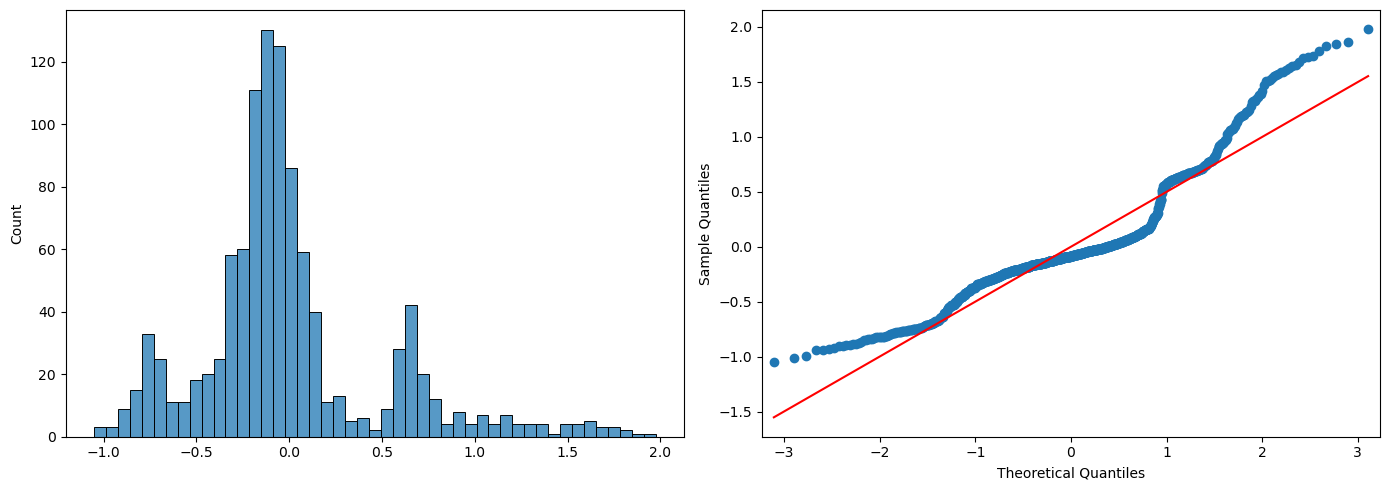

In [71]:
# Kiểm tra tính tuyến tinh va chuan tac của mô hình
# Hiển thị biểu đồ histogram và Biểu đồ Q - Q
residuals = model.resid

# Tạo figure với hai axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vẽ biểu đồ histogram trên axes đầu tiên
sns.histplot(residuals, ax=axes[0])

# Vẽ biểu đồ Q-Q trên axes thứ hai
sm.qqplot(residuals, line='s', ax=axes[1])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<b>Nhận xét: Qua biểu đồ ta thấy dữ liệu không đạt tính chuẩn tắc, giá trị dữ liệu dư còn có sai số khá cao và giá trị dư có sự phân bố không tốt lắm, vì rất nhiều dữ liệu có mức chênh lệch khá cao.</b>

<h2>Kiểm tra tính đồng nhất</h2>

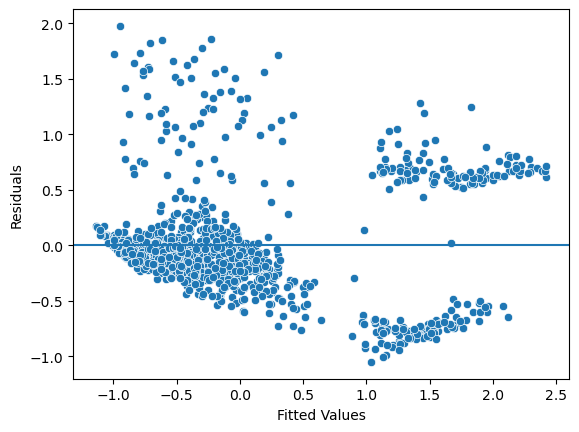

In [74]:
# Kiểm tra tính đồng nhất
fitted_values = model.predict(data[['smoker_encoded', 'age_bmi_risk', 'children', 'region_encoded']])
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Tạo đường line bằng 0
fig.axhline(0)

# Tạo tên cho 2 biến X Y
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()


<b>Nhận xét: Qua biểu đồ thấy dữ liệu không đồng nhất, do các giá trị dư đang bị lệch về nhiều vị trí sai số khác, với độ sai số cao và cục bộ, không đồng đều</b>

<h2>Kiểm tra hiện tượng fitting</h2>

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adj_r2}")

Root Mean Squared Error: 0.5114641256774854
R^2: 0.7226935755586906
Adjusted R^2: 0.7184436686707012


E:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Nhận xét:<br>
•	RMSE vẫn ở mức khá cao thể hiện bình phương sai số của mô hình, với mô hình này tỉ lệ chênh lệch dư giữa giá trị thực tế và giá trị huấn luyện cao nên RMSE vẫn ở mức khá cao.<br>
•	Ta thấy Adjusted R^2 của tập dữ liệu huấn luyện (0.75) gần bằng Adjusted R^2 của tập dữ liệu thực tế test (0.73), nên mô hình không bị overfitting hay underfitting do chênh lệnh rất thấp.</b>


<h1 style="text-align: center;">8. KẾT LUẬN</h1>

<b>Thông qua việc nghiên cứu này, cũng phản ánh được sự quan trọng của sức khỏe con người và ảnh hưởng nghiêm trọng nhất từ việc hút thuốc lá. Để duy trì sức khỏe tốt và tránh chi phí y tế không cần thiết, việc không hút thuốc lá và duy trì một chế độ ăn uống khoa học là rất quan trọng.</b>
